# BIKE SHARING LINEAR REGRESSION MODEL

## Reading and Understanding Data

In [108]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [52]:
# read the data
bike_data = pd.read_csv('/Users/vernica.ahuja/Downloads/Linear Regression/Bike Sharing Assignment - Linear Regression/day.csv')

In [53]:
# Shape of the dataframe
bike_data.shape

(730, 16)

In [54]:
# Subset of dataset
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/18,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02/01/18,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03/01/18,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04/01/18,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05/01/18,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Cleaning data

In [55]:
#check datatype and null values within the dataframe
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


1. Data has 730 Rows and 16 Columns
2. All columns are either Float or Integer except one as object type

In [56]:
# Unique values within each column
bike_data.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

Drop Columns:
    
    1. instant - it is a serial no. column
    
    2. dteday - it denotes the date for which the data is present (all unique values)

    3. Casual & registered - these are subset of the target variable 'cnt' 
                             and thus they will not be available when we have to predict the 
                             users who will rent the bikes

In [57]:
# Drop columns
bike_data.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [58]:
bike_data.shape

(730, 12)

In [59]:
# Check duplicate rows within dataset
bike_data.drop_duplicates(subset=None, inplace=True)
print(bike_data.shape)

(730, 12)


There are no duplicate rows

In [60]:
bike_data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [61]:
# Renaming levels within categorical variables
bike_data.season = bike_data.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [62]:
bike_data.season.unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [63]:
bike_data.mnth.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [64]:
bike_data.mnth = bike_data.mnth.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',
                                     9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [65]:
bike_data.mnth.unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [66]:
bike_data.weekday = bike_data.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [67]:
bike_data.weathersit = bike_data.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [68]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [69]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 74.1+ KB


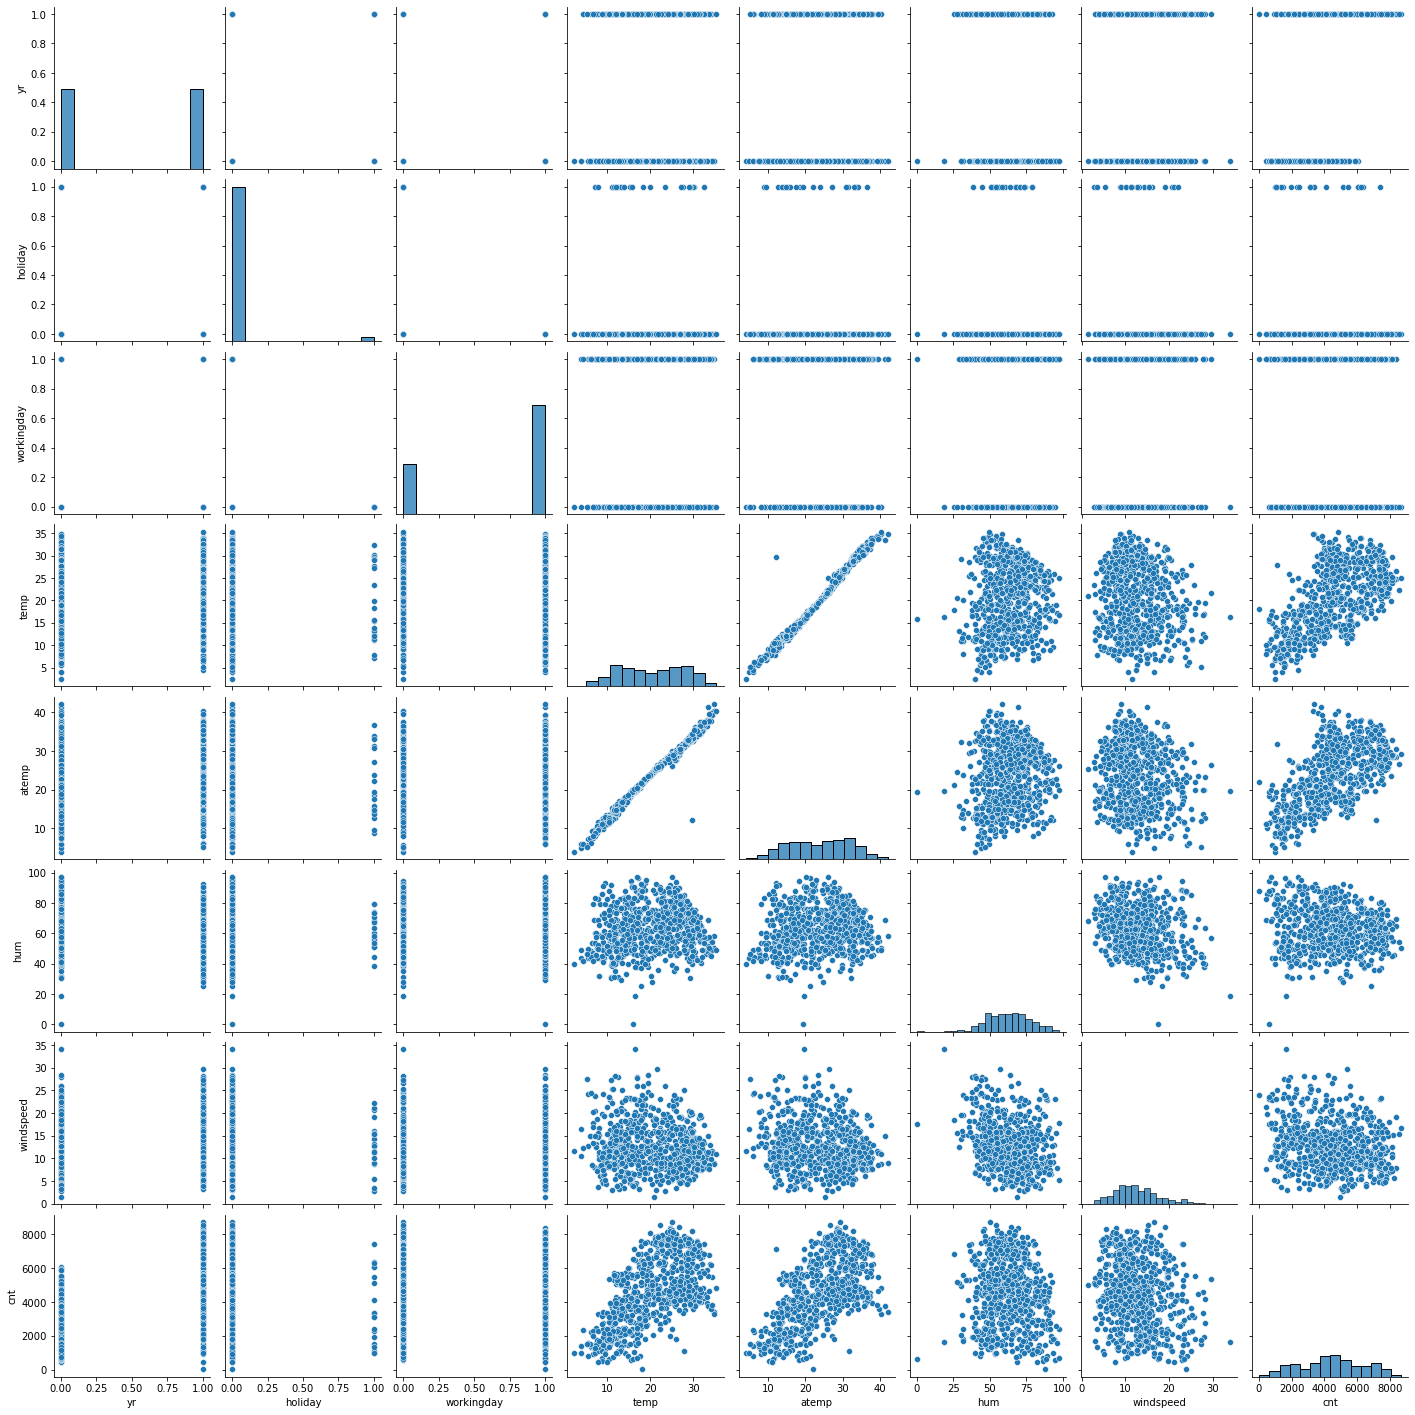

In [70]:
# visualising numeric variables`
sns.pairplot(bike_data)
plt.show()

1. temp & atemp look linearly related to the target variable cnt
2. temp & atemp are also correlated to each other

In [71]:
bike_data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

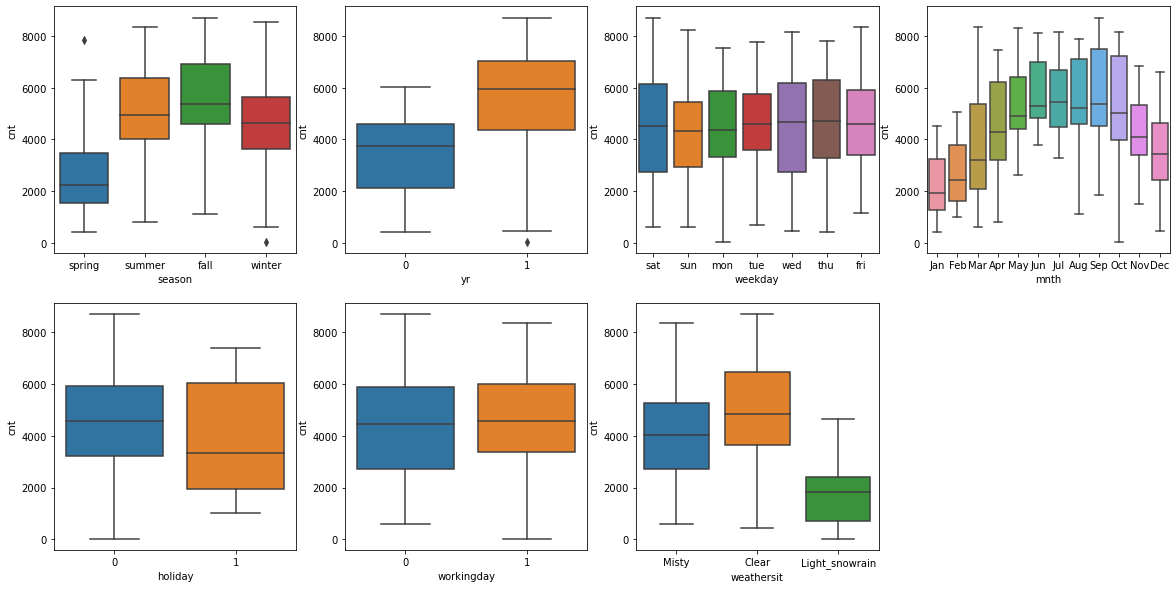

In [72]:
# visualising categorical variables
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
sns.boxplot(x='season',y='cnt',data=bike_data)
plt.subplot(2,4,2)
sns.boxplot(x='yr',y='cnt',data=bike_data)
plt.subplot(2,4,3)
sns.boxplot(x='weekday',y='cnt',data=bike_data)
plt.subplot(2,4,4)
sns.boxplot(x='mnth',y='cnt',data=bike_data)
plt.subplot(2,4,5)
sns.boxplot(x='holiday',y='cnt',data=bike_data)
plt.subplot(2,4,6)
sns.boxplot(x='workingday',y='cnt',data=bike_data)
plt.subplot(2,4,7)
sns.boxplot(x='weathersit',y='cnt',data=bike_data)

### Insights:

    1. Season: Demand for rental bikes is highest in the Fall season
    2. Yr : Demand has increased in 2019 
    3. Weekday does not show a direct relation with demand of rental bikes
    4. Demand increases from March - Aug and then decreases for the rest of the month
    5. Misty and Clear Weather has higher demand as compared to Light snowrain
    

## Preparing data for modelling

Encoding:
    
    1. Converting binary variables to 1/0 which already exists like yr, holiday, weekday etc.
    2. Other categorical vars to dummy vars

In [74]:
# Create Dummy Variables
bike_data = pd.get_dummies(data=bike_data,columns=['season','weekday','mnth','weathersit'],drop_first=True)
bike_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weathersit_Light_snowrain,weathersit_Misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,1,0,0,0,0,0,0,0,0,0


In [76]:
# Split data into train and test
df_train,df_test = train_test_split(bike_data, train_size=0.7, random_state = 100)

In [78]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [85]:
# Scaling the train & test dataset using min-max scaler
scaler = MinMaxScaler()

In [82]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'mnth_Sep', 'weathersit_Light_snowrain', 'weathersit_Misty'],
      dtype='object')

In [87]:
# appyling scaler to numerical variables
scaling_vars  = ['temp','atemp','hum','windspeed','cnt']

In [88]:
df_train[scaling_vars] = scaler.fit_transform(df_train[scaling_vars])

In [89]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weathersit_Light_snowrain,weathersit_Misty
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,1,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,1


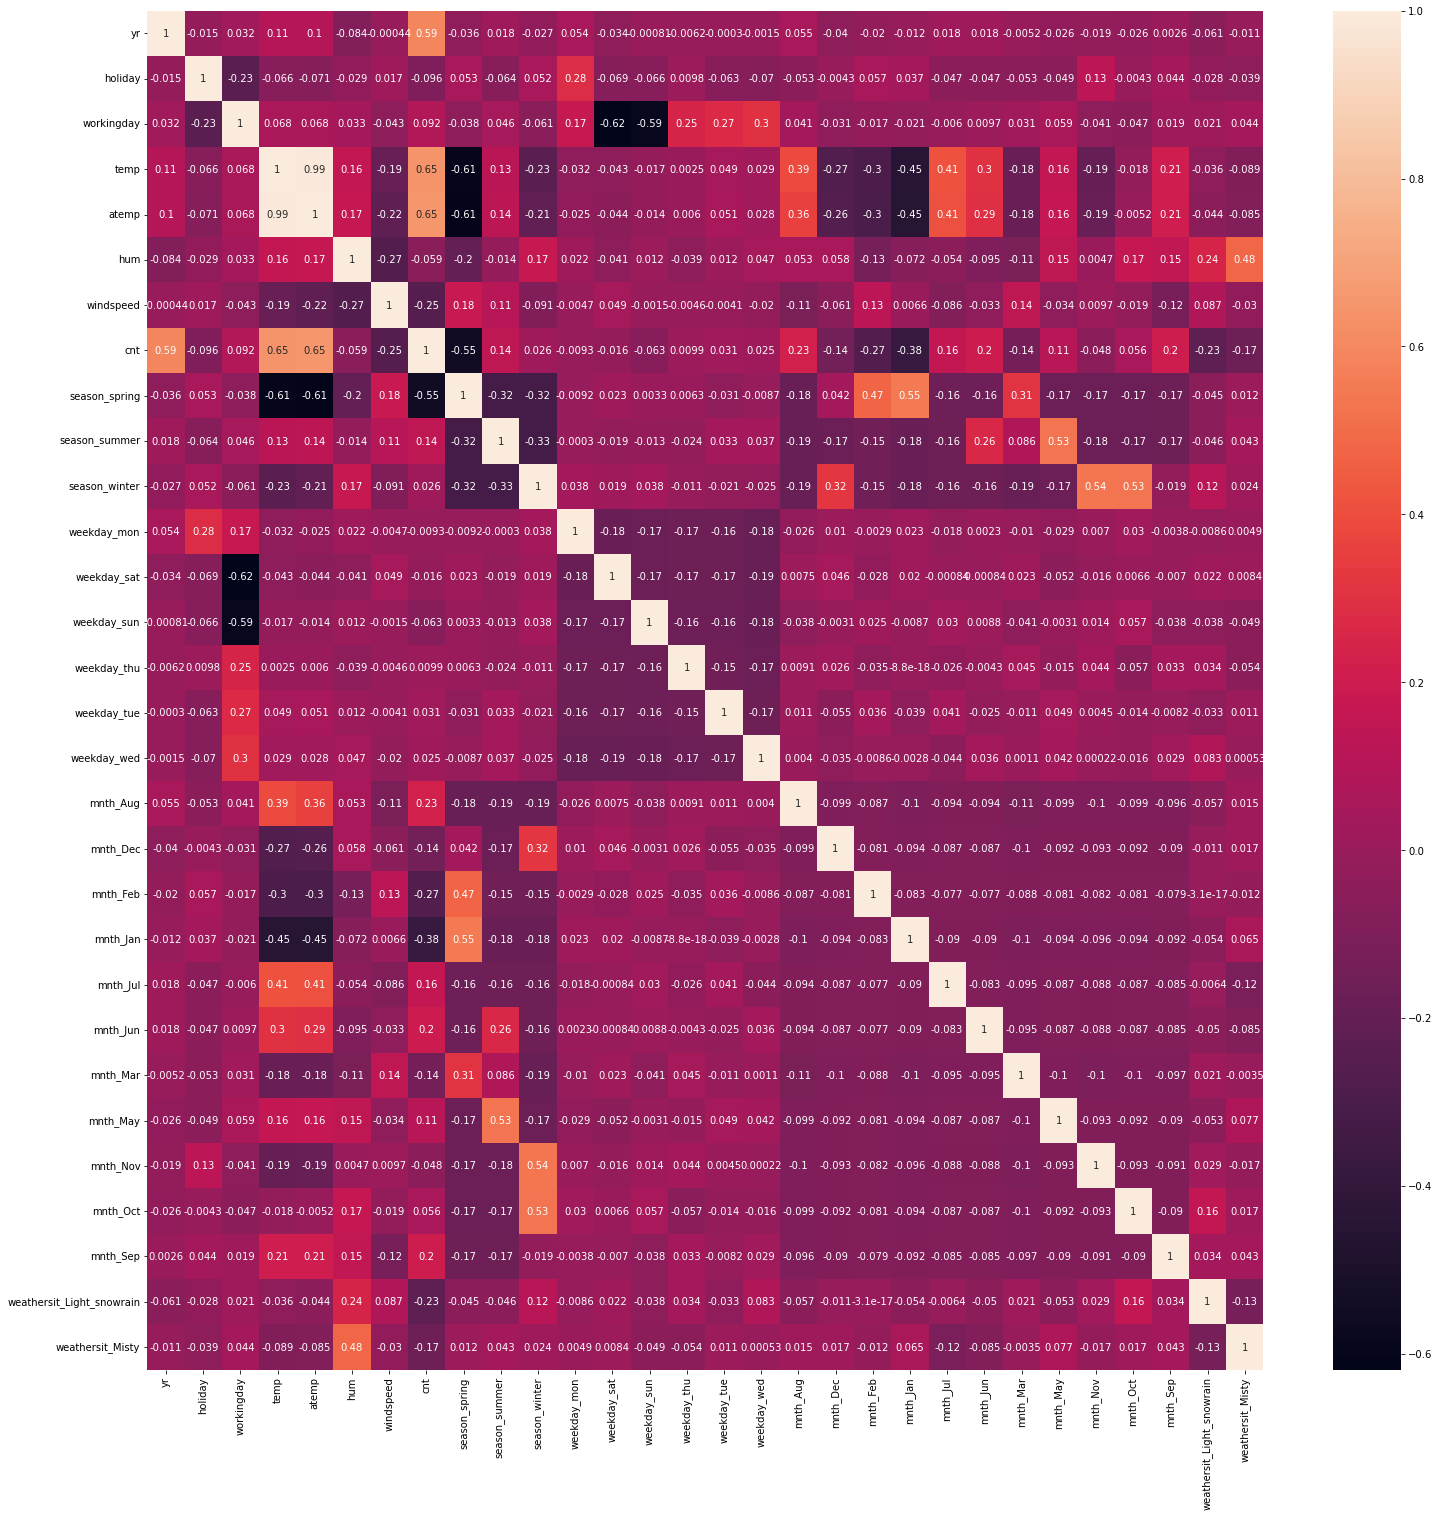

In [99]:
# correlation of variables with target variable
corr = df_train.corr()
plt.figure(figsize = (25,25))
sns.heatmap(corr,annot=True)
plt.show()

### Inference: 
    
    1. Temp & atemp are highly correlated with correlation factor of 0.99
    2. Similarly temp & atemp seem to negatively correlated with spring season 
    3. workingday seem to be negatively correlated with Sat & sun weekdays

## Feature selection

In [100]:
# Splitting target variable and predictor variables
y_train = df_train.pop('cnt')
X_train = df_train

In [118]:
# Recursive Feature Elimination

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)


In [119]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 8),
 ('weekday_thu', False, 11),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 12),
 ('mnth_Aug', False, 7),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 13),
 ('mnth_Sep', True, 1),
 ('weathersit_Light_snowrain', True, 1),
 ('weathersit_Misty', True, 1)]

In [120]:
# selecting the RFE selected variables
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'weekday_sat',
       'mnth_Jan', 'mnth_Jul', 'mnth_Sep', 'weathersit_Light_snowrain',
       'weathersit_Misty'],
      dtype='object')


In [121]:
# rejected variables
X_train.columns[~rfe.support_]

Index(['atemp', 'weekday_mon', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct'],
      dtype='object')

In [125]:
X_train_rfe = X_train[col]

## Building a model

In [126]:
# Building 1st linear regression model

X_train_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 12 Dec 2022   Prob (F-statistic):          4.22e-191
Time:                        23:09:07   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [148]:
# VIF
def calculateVIF(df):
    vif = pd.DataFrame()
    X = df
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by="VIF",ascending=False)
    return vif


In [153]:
calculateVIF(X_train_rfe)

,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
6,season_spring,4.53
8,season_winter,3.46
7,season_summer,2.85
14,weathersit_Misty,2.29
0,yr,2.09
9,weekday_sat,1.98


In [154]:
# Drop variables that have high VIF values
X_train_new = X_train_rfe.drop(['hum'], axis = 1)

In [155]:
X_train_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'weekday_sat', 'mnth_Jan', 'mnth_Jul',
       'mnth_Sep', 'weathersit_Light_snowrain', 'weathersit_Misty'],
      dtype='object')

In [158]:
# Building 2nd linear regression model

X_train_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          1.60e-188
Time:                        00:31:45   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [159]:
# Again running VIF function
calculateVIF(X_train_new)

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
5,season_spring,3.07
6,season_summer,2.34
0,yr,2.08
7,season_winter,1.98
8,weekday_sat,1.97
9,mnth_Jan,1.62
10,mnth_Jul,1.59


In [160]:
X_train_new = X_train_new.drop(['temp'], axis = 1)

In [161]:
# again calculating VIF
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.27
2,workingday,3.83
4,season_spring,2.97
5,season_summer,2.29
6,season_winter,1.98
0,yr,1.91
7,weekday_sat,1.69
8,mnth_Jan,1.60
12,weathersit_Misty,1.57
9,mnth_Jul,1.30


In [162]:
# Building 3rd linear regression model

X_train_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_3).fit()
print(lr_3.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     135.7
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          6.44e-154
Time:                        00:32:17   Log-Likelihood:                 425.63
No. Observations:                 510   AIC:                            -823.3
Df Residuals:                     496   BIC:                            -764.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [164]:
# Drop variables with high P-value
X_train_new = X_train_new.drop(['mnth_Jul'], axis = 1)

In [165]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.12
2,workingday,3.54
4,season_spring,2.68
5,season_summer,2.01
0,yr,1.89
6,season_winter,1.78
7,weekday_sat,1.62
8,mnth_Jan,1.60
11,weathersit_Misty,1.57
9,mnth_Sep,1.20


In [166]:
# Building 4th linear regression model

X_train_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     147.2
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          5.73e-155
Time:                        18:34:27   Log-Likelihood:                 425.53
No. Observations:                 510   AIC:                            -825.1
Df Residuals:                     497   BIC:                            -770.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [167]:
# Drop variables with high P-value
X_train_new = X_train_new.drop(['holiday'], axis = 1)

In [169]:
# Building 5th linear regression model

X_train_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     159.7
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          2.01e-155
Time:                        18:35:29   Log-Likelihood:                 423.97
No. Observations:                 510   AIC:                            -823.9
Df Residuals:                     498   BIC:                            -773.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [170]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,windspeed,4.04
1,workingday,3.29
3,season_spring,2.65
4,season_summer,2.00
0,yr,1.88
5,season_winter,1.73
7,mnth_Jan,1.60
10,weathersit_Misty,1.57
6,weekday_sat,1.56
8,mnth_Sep,1.18


Insights:

Consider lr_5 as the final model as VIF for all variables is <5 and P-value of all variables is less than 0.05.

Prob(F-Statistic) is also close to 0.

In [171]:
y_train_pred = lr_5.predict(X_train_5)

## Assumptions of Linear Regression

### Residual Analysis of the train data

Text(0.5, 0, 'Errors')

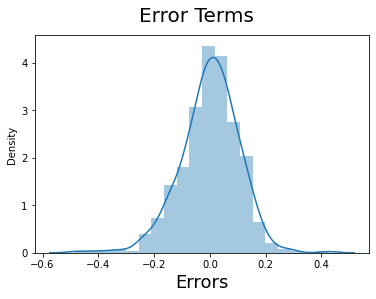

In [174]:
#Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

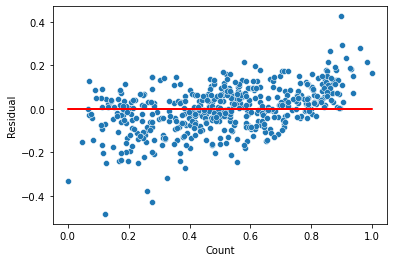

In [215]:
# Homoscedasticity
res = (y_train - y_train_pred)
sns.scatterplot(y_train,res)
plt.plot(y_train,(res - res), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

### Inference:

    There does not seem to be variance in the error terms

## Making predictions on test data

### Applying scaling on test data

In [177]:
df_test[scaling_vars] = scaler.transform(df_test[scaling_vars])

### dividing into X_test & y_test

In [179]:
y_test = df_test.pop('cnt')
X_test = df_test

In [184]:
cols = X_train_new.columns

In [186]:
X_test = X_test[cols]

In [188]:
X_test_lm = sm.add_constant(X_test)

In [190]:
# Predicting on test data
y_test_pred = lr_5.predict(X_test_lm)

## Model Evaluation

In [192]:
from sklearn.metrics import r2_score

In [193]:
r2 = r2_score(y_test, y_test_pred)

In [196]:
r2 = round(r2,3)
r2

0.742

R2 is 0.742 which is close to the adjust R2 of the train set i.e. 0.774

In [222]:
round(lr_5.params,4).sort_values(ascending=False)

const                        0.5332
yr                           0.2480
mnth_Sep                     0.0715
weekday_sat                  0.0648
workingday                   0.0564
season_summer               -0.0394
season_winter               -0.0743
weathersit_Misty            -0.0874
mnth_Jan                    -0.1033
windspeed                   -0.1887
season_spring               -0.2581
weathersit_Light_snowrain   -0.3023
dtype: float64

Equation:
    
    cnt = 0.5332 + 0.2480 * yr + 0.0564 * workingday + (-0.1887) * windspeed + (-0.2581) * season_spring + 
    
         (-0.0394) * season_summer + (-0.0743) * season_winter + (0.0648) * weekday_sat + (-0.1033) * mnth_Jan 
            
         + (0.0715) * mnth_Sep + (-0.3023) * weathersit_Light_snowrain + (-0.0874) * weathersit_Misty

Text(0, 0.5, 'y_test_pred')

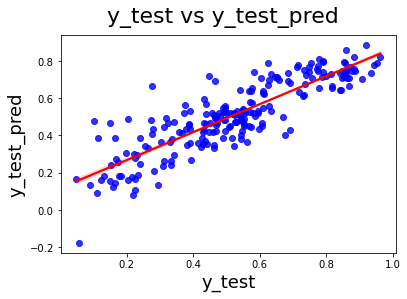

In [220]:
# Plotting y_test  and y_pred  to understand the spread
fig = plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
fig.suptitle('y_test vs y_test_pred', fontsize=22)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=18)

In [207]:
# Adjust R^2 of the test data

adjusted_r2 = round(1-((1-r2)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))),4)
print(adjusted_r2)


0.7284


### Comparison of Test & Train set:
    
    R^2 for Train set:  0.779
    R^2 for Test set:   0.742
    Adj R^2 for Train set: 0.774
    Adj R^2 for Test set:  0.728

#### Predictor variables that impact the most:

        1. 'yr' with a coefficient +0.2480
        2. 'weathersit_Light_snowrain' with a coeff of (-0.3023)
        3. 'season_spring' with a coeff of (-0.2581)
    